In [11]:
!pip list

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
beautifulsoup4 (4.5.3)
chardet (2.3.0)
chrome-gnome-shell (0.0.0)
cryptography (1.7.1)
enum34 (1.1.6)
html5lib (0.999999999)
httplib2 (0.9.2)
idna (2.2)
ipaddress (1.0.17)
keyring (10.1)
keyrings.alt (1.3)
lxml (3.7.1)
numpy (1.16.6)
pandas (0.24.2)
pip (9.0.1)
pyasn1 (0.1.9)
pycrypto (2.6.1)
pycurl (7.43.0)
pygobject (3.22.0)
pyOpenSSL (16.2.0)
python-apt (1.4.1)
python-dateutil (2.8.1)
python-debian (0.1.30)
python-debianbts (2.6.1)
pytz (2021.1)
pyxdg (0.25)
reportbug (6.6.3)
requests (2.12.4)
scour (0.32)
SecretStorage (2.3.1)
setuptools (44.1.1)
six (1.16.0)
urllib3 (1.19.1)
webencodings (0.5)
wheel (0.36.2)


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

In [123]:
# matplotlib 한글 설정
plt.rcParams["font.family"] = 'NanumGothicCoding'

In [19]:
fr = pd.read_csv('FOREIGNER_RE.txt', encoding = 'UTF-8', sep = '|')

In [21]:
fr.head()

,nt,v2,v3,gb3,gb2,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,태국,서울,용산구,쇼핑,기타지출,201703,WHITE,기타,3917910,55
1,일본,서울,용산구,쇼핑,기타지출,201805,WHITE,기타,11586560,261
2,영국,서울,용산구,쇼핑,기타지출,201807,WHITE,기타,3483630,120
3,베트남,경기,오산시,쇼핑,기타지출,201705,WHITE,기타,12000,9
4,미국,서울,용산구,쇼핑,기타지출,201802,RED,기타,20831646,449


In [22]:
nt = pd.read_csv('NATIVE_RE.txt', encoding='UTF-8', sep = '|')

/home/dohee/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
nt.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,외식,M,30,201701,RED,활동,351296766,19010
1,세종,세종,.,취미오락,종합쇼핑,M,50,201701,RED,휴식,72244196,2375
2,세종,세종,.,취미오락,종합쇼핑,M,30,201701,WHITE,휴식,532911085,19979
3,충남,세종,.,취미오락,종합쇼핑,M,50,201701,WHITE,활동,50972534,951
4,충남,세종,.,취미오락,종합쇼핑,M,40,201701,RED,휴식,19104457,408


In [25]:
nt.shape

(52714754, 12)

In [26]:
nt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52714754 entries, 0 to 52714753
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   v1              object
 1   v2              object
 2   v3              object
 3   gb3             object
 4   gb2             object
 5   sex_ccd         object
 6   cln_age_r       object
 7   ta_ym           int64 
 8   daw_ccd_r       object
 9   apv_ts_dl_tm_r  object
 10  vlm             int64 
 11  usec            int64 
dtypes: int64(3), object(9)
memory usage: 4.7+ GB


In [27]:
nt.isnull().sum()

v1                256988
v2                     0
v3                     0
gb3                    0
gb2                    0
sex_ccd                0
cln_age_r              0
ta_ym                  0
daw_ccd_r              0
apv_ts_dl_tm_r         0
vlm                    0
usec                   0
dtype: int64

In [28]:
nt.describe(include='all')

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
count,52457766,52714754,52714754,52714754,52714754,52714754,52714754.0,5.271475e+07,52714754,52714754,5.271475e+07,5.271475e+07
unique,17,17,207,4,28,2,12.0,NaN,2,3,NaN,NaN
top,경기,서울,중구,취미오락,외식,M,20.0,NaN,WHITE,활동,NaN,NaN
freq,6177831,9728025,2017931,34472779,8975520,29601392,12286151.0,NaN,28708982,27553609,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018748e+05,NaN,NaN,2.816022e+07,7.619679e+02
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.265363e+02,NaN,NaN,2.596112e+09,8.784552e+03
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.017010e+05,NaN,NaN,0.000000e+00,4.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018010e+05,NaN,NaN,1.675110e+05,5.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019020e+05,NaN,NaN,6.677740e+05,1.900000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020030e+05,NaN,NaN,3.255954e+06,8.400000e+01


In [29]:
nt.corr()

,ta_ym,vlm,usec
ta_ym,1.000000,0.000444,0.005544
vlm,0.000444,1.000000,0.126414
usec,0.005544,0.126414,1.000000


In [30]:
nt['gb3'].value_counts()

취미오락      34472779
스포츠활동      7779292
여행         7007472
문화예술활동     3455211
Name: gb3, dtype: int64

In [ ]:
nt[]

In [31]:
nt['gb2'].value_counts()

외식         8975520
종합쇼핑       7442282
숙박         4122197
미용         3457785
인터넷게임      2977723
패션쇼핑       2769096
유흥         2344594
스포츠용품구매    2320203
목욕         2285910
레저스포츠      2137664
공연관람       1843153
골프         1711486
독서         1487462
애완동물돌보기    1239324
헬스         1216500
체험         1153043
교육훈련       1017684
교통          857393
사진촬영        746901
관광쇼핑        656987
미술공예참여      495565
종교활동        475399
자전거         349054
음악감상        223473
여행사         217852
악기연주        146119
스키           40728
운동경기관람        3657
Name: gb2, dtype: int64

In [38]:
nt['ta_ym'].value_counts().sort_index(ascending=False)

202105     983620
202104     933180
202103     914870
202102     856530
202101     784258
202012     788676
202011     958233
202010    1004240
202009     885528
202008    1022177
202007     996978
202006     960942
202005     987854
202004     871036
202003     827245
202002     904508
202001    1015403
201912    1024649
201911    1035821
201910    1053648
201909    1039149
201908    1106414
201907    1053670
201906    1063918
201905    1067870
201904    1019752
201903    1039306
201902    1000523
201901     990052
201812    1017821
201811    1009142
201810    1032299
201809    1063604
201808    1064948
201807    1053759
201806    1039993
201805    1063169
201804    1020174
201803    1011310
201802     958501
201801     970629
201712    1006914
201711     988670
201710    1071017
201709    1022035
201708    1070037
201707    1053183
201706    1026290
201705    1061614
201704    1021552
201703     987224
201702     939396
201701     971423
Name: ta_ym, dtype: int64

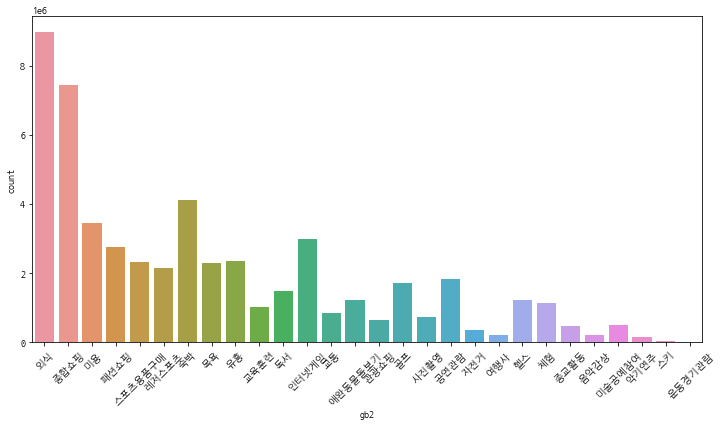

In [381]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x='gb2', data=nt)
ax.tick_params (axis= 'x', labelrotation= 45)

In [46]:
?sns

In [52]:
nt['v2'].value_counts()

서울    9728025
경기    8733762
부산    3832920
경북    3631179
강원    3363646
경남    3140599
전남    3117551
충남    3071841
인천    2473159
전북    2293722
충북    2069290
대구    2010458
대전    1641966
광주    1281214
울산    1086410
제주     925164
세종     313848
Name: v2, dtype: int64

In [111]:
fr['ta_ym'].value_counts().sort_index(ascending=False)

202105    50730
202104    48133
202103    47968
202102    44541
202101    43800
202012    45313
202011    49646
202010    51382
202009    48639
202008    51842
202007    52401
202006    50277
202005    50010
202004    44416
202003    44210
202002    61602
202001    67964
201912    72602
201911    73235
201910    76501
201909    72693
201908    73415
201907    72794
201906    73470
201905    73052
201904    72999
201903    67992
201902    61777
201901    62672
201812    68212
201811    67753
201810    71129
201809    69023
201808    67110
201807    68527
201806    68548
201805    68509
201804    68656
201803    65332
201802    60452
201801    59269
201712    64960
201711    64307
201710    67154
201709    64890
201708    63635
201707    65612
201706    63701
201705    64428
201704    64792
201703    60075
201702    55226
201701    57158
Name: ta_ym, dtype: int64

In [53]:
nt.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,외식,M,30,201701,RED,활동,351296766,19010
1,세종,세종,.,취미오락,종합쇼핑,M,50,201701,RED,휴식,72244196,2375
2,세종,세종,.,취미오락,종합쇼핑,M,30,201701,WHITE,휴식,532911085,19979
3,충남,세종,.,취미오락,종합쇼핑,M,50,201701,WHITE,활동,50972534,951
4,충남,세종,.,취미오락,종합쇼핑,M,40,201701,RED,휴식,19104457,408


In [115]:
nt['gb3'].value_counts()

취미오락      34472779
스포츠활동      7779292
여행         7007472
문화예술활동     3455211
Name: gb3, dtype: int64

In [116]:
nt['gb2'].value_counts()

외식         8975520
종합쇼핑       7442282
숙박         4122197
미용         3457785
인터넷게임      2977723
패션쇼핑       2769096
유흥         2344594
스포츠용품구매    2320203
목욕         2285910
레저스포츠      2137664
공연관람       1843153
골프         1711486
독서         1487462
애완동물돌보기    1239324
헬스         1216500
체험         1153043
교육훈련       1017684
교통          857393
사진촬영        746901
관광쇼핑        656987
미술공예참여      495565
종교활동        475399
자전거         349054
음악감상        223473
여행사         217852
악기연주        146119
스키           40728
운동경기관람        3657
Name: gb2, dtype: int64

In [56]:
nt['cln_age_r'].value_counts()

20    12286151
30    11162580
40    11030325
50    10232528
60     7020130
20      242212
30      214268
40      209919
50      189707
60      126914
기타          19
.            1
Name: cln_age_r, dtype: int64

In [57]:
nt['cln_age_r'].unique()

array([30, 50, 40, 60, 20, '20', '50', '40', '30', '60', '기타', '.'],
      dtype=object)

In [62]:
nt.loc[nt['cln_age_r'] == '20','cln_age_r'] = 20
nt.loc[nt['cln_age_r'] == '30','cln_age_r'] = 30
nt.loc[nt['cln_age_r'] == '40','cln_age_r'] = 40
nt.loc[nt['cln_age_r'] == '50','cln_age_r'] = 50
nt.loc[nt['cln_age_r'] == '60','cln_age_r'] = 60

In [63]:
nt['cln_age_r'].unique()

array([30, 50, 40, 60, 20, '기타', '.'], dtype=object)

In [297]:
nt[(nt['cln_age_r'] == '기타') | (nt['cln_age_r'] == '.')]

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
1790518,부산,경기,성남시,취미오락,종합쇼핑,F,기타,201702,WHITE,활동,176320,4
1936118,경기,경기,시흥시,취미오락,종합쇼핑,M,기타,201703,RED,활동,64097,4
2001690,경기,경기,시흥시,취미오락,외식,M,기타,201703,RED,휴식,47200,4
2089160,경기,경기,시흥시,취미오락,외식,M,기타,201703,RED,활동,28320,4
2141736,경기,경기,시흥시,취미오락,미용,M,기타,201703,WHITE,휴식,37760,4
2153625,경기,경기,시흥시,취미오락,패션쇼핑,M,기타,201703,WHITE,휴식,7080,4
2209102,경기,경기,시흥시,취미오락,종합쇼핑,M,기타,201703,WHITE,휴식,64616,9
2456501,경기,경기,시흥시,취미오락,인터넷게임,M,기타,201703,RED,휴식,8307,4
3135828,부산,서울,영등포구,취미오락,종합쇼핑,F,기타,201704,WHITE,활동,375060,4
3146500,경기,경기,시흥시,취미오락,종합쇼핑,M,기타,201704,RED,휴식,564000,4


In [298]:
# 연령 = '기타'가 차지하는 비율
nt[(nt['cln_age_r'] == '기타') | (nt['cln_age_r'] == '.')].sum(numeric_only = True)/ nt.sum(numeric_only = True)

vlm     1.878874e-09
usec    2.365129e-09
dtype: float64

In [299]:
# 전체에 큰 영향을 미치지 않으므로 삭제
nt = nt[(nt['cln_age_r'] != '기타') & (nt['cln_age_r'] != '.')]

In [300]:
nt['cln_age_r'].value_counts()

20    12528363
30    11376848
40    11240244
50    10422235
60     7147044
Name: cln_age_r, dtype: int64

In [301]:
nt = nt.astype({'cln_age_r': int})
nt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52714734 entries, 0 to 52714753
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   v1              object
 1   v2              object
 2   v3              object
 3   gb3             object
 4   gb2             object
 5   sex_ccd         object
 6   cln_age_r       int64 
 7   ta_ym           object
 8   daw_ccd_r       object
 9   apv_ts_dl_tm_r  object
 10  vlm             int64 
 11  usec            int64 
dtypes: int64(3), object(9)
memory usage: 5.1+ GB


In [303]:
# 이용건수 당 취급액 (vlm per usec (vpu))
nt['vpu'] = nt['vlm']/nt['usec']
nt.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,vpu
0,세종,세종,.,취미오락,외식,M,30,201701,RED,활동,351296766,19010,18479.577380
1,세종,세종,.,취미오락,종합쇼핑,M,50,201701,RED,휴식,72244196,2375,30418.608842
2,세종,세종,.,취미오락,종합쇼핑,M,30,201701,WHITE,휴식,532911085,19979,26673.561490
3,충남,세종,.,취미오락,종합쇼핑,M,50,201701,WHITE,활동,50972534,951,53598.879075
4,충남,세종,.,취미오락,종합쇼핑,M,40,201701,RED,휴식,19104457,408,46824.649510


In [315]:
# nt2 = 2019~2021 data만 뽑기
nt['ta_ym'] = nt['ta_ym'].astype(int)
nt2 = nt[nt['ta_ym'] >= 201901]
nt2.describe(include = 'all')

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,vpu
count,27933062,28190050,28190050,28190050,28190050,28190050,2.819005e+07,2.819005e+07,28190050,28190050,2.819005e+07,2.819005e+07,2.819005e+07
unique,17,17,207,4,28,2,NaN,NaN,2,3,NaN,NaN,NaN
top,경기,서울,중구,취미오락,외식,M,NaN,NaN,WHITE,활동,NaN,NaN,NaN
freq,3327434,5123524,1046236,18579154,4898979,15833499,NaN,NaN,15400410,15002919,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.807181e+01,2.019775e+05,NaN,NaN,2.869871e+07,8.017689e+02,6.191018e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,1.368195e+01,7.126892e+01,NaN,NaN,1.279955e+09,9.368789e+03,5.192960e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+01,2.019010e+05,NaN,NaN,0.000000e+00,4.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+01,2.019070e+05,NaN,NaN,1.655000e+05,5.000000e+00,1.293708e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+01,2.020020e+05,NaN,NaN,6.665480e+05,2.000000e+01,2.609053e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+01,2.020100e+05,NaN,NaN,3.249486e+06,8.500000e+01,5.397190e+04


In [333]:
nt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28190050 entries, 24524704 to 52714753
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   v1              object 
 1   v2              object 
 2   v3              object 
 3   gb3             object 
 4   gb2             object 
 5   sex_ccd         object 
 6   cln_age_r       int64  
 7   ta_ym           object 
 8   daw_ccd_r       object 
 9   apv_ts_dl_tm_r  object 
 10  vlm             int64  
 11  usec            int64  
 12  vpu             float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.9+ GB


In [379]:
# 코로나 이전과 이후 데이터 나누기
nt_bf = nt[nt['ta_ym'] < 202003]
nt_af = nt[nt['ta_ym'] >= 202003]
print(nt_bf, nt_af)

          v1  v2    v3     gb3   gb2 sex_ccd  cln_age_r   ta_ym daw_ccd_r  \
0         세종  세종     .    취미오락    외식       M         30  201701       RED   
1         세종  세종     .    취미오락  종합쇼핑       M         50  201701       RED   
2         세종  세종     .    취미오락  종합쇼핑       M         30  201701     WHITE   
3         충남  세종     .    취미오락  종합쇼핑       M         50  201701     WHITE   
4         충남  세종     .    취미오락  종합쇼핑       M         40  201701       RED   
...       ..  ..   ...     ...   ...     ...        ...     ...       ...   
38939382  충남  부산  해운대구    취미오락  종합쇼핑       F         40  202002     WHITE   
38939383  경북  부산  해운대구    취미오락    목욕       M         40  202002     WHITE   
38939384  경남  부산  해운대구    취미오락    유흥       F         30  202002     WHITE   
38939385  경기  부산  해운대구      여행    숙박       M         50  202002       RED   
38939386  대전  부산  해운대구  문화예술활동  공연관람       M         30  202002     WHITE   

         apv_ts_dl_tm_r        vlm   usec           vpu  
0                

In [113]:
# orlder = nt2[nt2['cln_age_r'] >= 50]

In [114]:
# orlder['gb3'].value_counts()

취미오락      11690993
스포츠활동      2585531
여행         2325987
문화예술활동      966768
Name: gb3, dtype: int64

### 시각화

In [318]:
# 문화예술활동만 분리
ct = nt2[nt2['gb3']=='문화예술활동']

In [335]:
ct.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,vpu
24524736,서울,세종,.,문화예술활동,공연관람,M,50,201901,WHITE,활동,243955,15,16263.666667
24524740,충남,세종,.,문화예술활동,사진촬영,M,30,201901,RED,활동,855100,5,171020.000000
24524746,경기,세종,.,문화예술활동,공연관람,F,40,201901,RED,활동,508030,40,12700.750000
24524761,경기,세종,.,문화예술활동,공연관람,M,40,201901,RED,활동,628750,50,12575.000000
24524763,전남,세종,.,문화예술활동,공연관람,F,30,201901,WHITE,휴식,115690,10,11569.000000


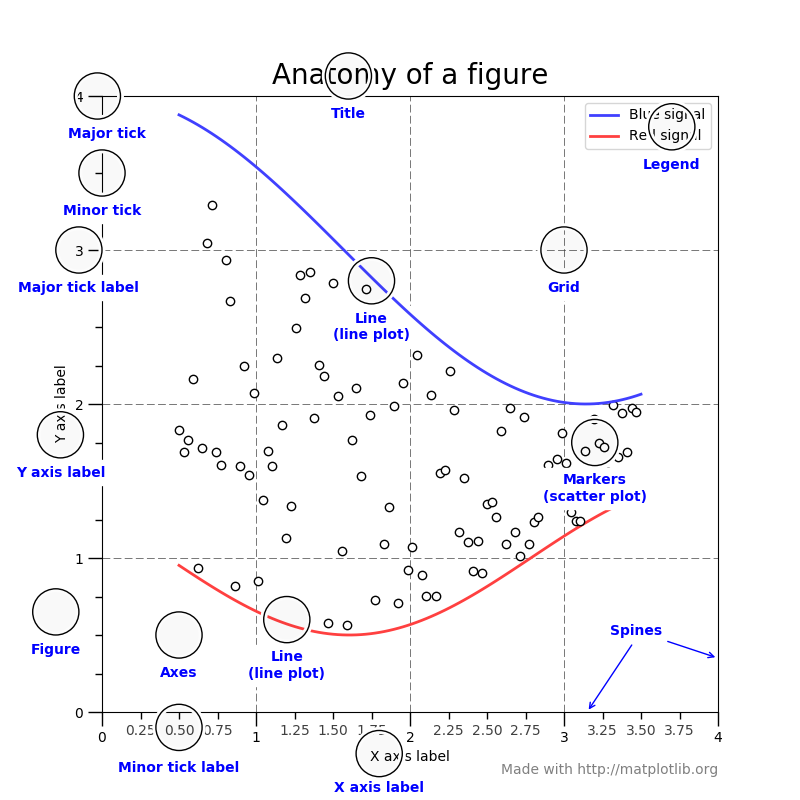

In [305]:
from IPython.display import Image

# 출처: matplotlib.org
Image('https://matplotlib.org/_images/anatomy.png')

In [339]:
ym_all = ct.groupby(['ta_ym'],as_index=False).sum()
print(ym_all.head())
ym = ct.groupby(['ta_ym','cln_age_r'],as_index=False).sum()
print(ym.head())

    ta_ym  cln_age_r           vlm     usec           vpu
0  201901    2405570  163249971602  7914556  3.245813e+09
1  201902    2514550  166354444308  8449023  3.195029e+09
2  201903    2547430  150626205996  7118805  3.294264e+09
3  201904    2453510  150801950268  7298673  3.250111e+09
4  201905    2691490  169788077660  8434043  3.500213e+09
    ta_ym  cln_age_r          vlm     usec           vpu
0  201901         20  37810684163  2639966  4.693118e+08
1  201901         30  40455987689  1881573  7.205010e+08
2  201901         40  43825052663  2056035  7.453806e+08
3  201901         50  26802269082  1017742  7.625524e+08
4  201901         60  14355978005   319240  5.480677e+08


In [328]:
ym['year'] = ym['ta_ym'].str[:4]
ym['month'] = ym['ta_ym'].str[4:]
ym.head()

,ta_ym,cln_age_r,vlm,usec,vpu,year,month
0,201901,20,37810684163,2639966,4.693118e+08,2019,01
1,201901,30,40455987689,1881573,7.205010e+08,2019,01
2,201901,40,43825052663,2056035,7.453806e+08,2019,01
3,201901,50,26802269082,1017742,7.625524e+08,2019,01
4,201901,60,14355978005,319240,5.480677e+08,2019,01


<function matplotlib.pyplot.show(close=None, block=None)>

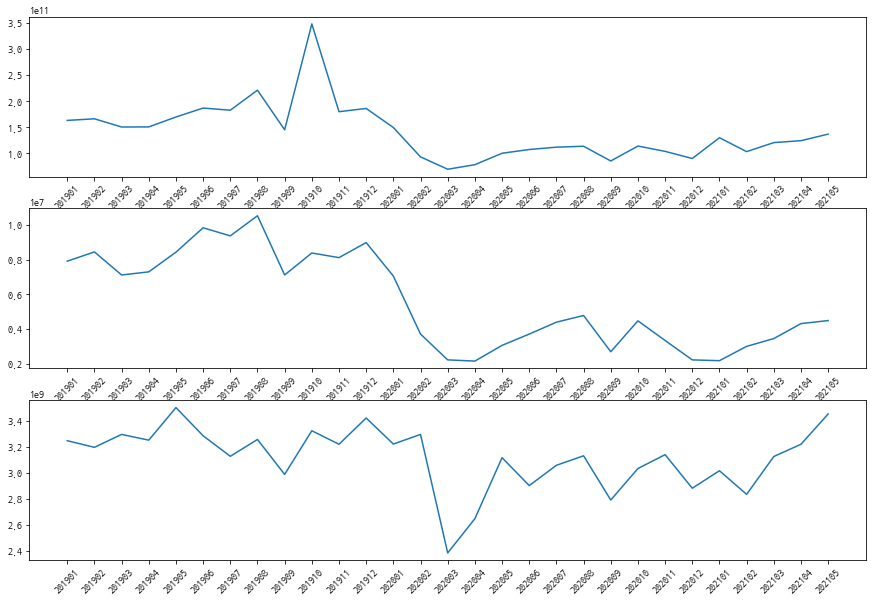

In [378]:
# 문화예술 향유 (전체 이용금액 / 이용건수 / 건당 이용금액)
fig,ax = plt.subplots(3,1,figsize=(15,10))

ax[0].plot('ta_ym', 'vlm', data = ym_all)
ax[0].tick_params (axis= 'x', labelrotation= 45)
ax[1].plot('ta_ym', 'usec', data = ym_all)
ax[1].tick_params (axis= 'x', labelrotation= 45)
ax[2].plot('ta_ym', 'vpu', data = ym_all)
ax[2].tick_params (axis= 'x', labelrotation= 45)

plt.show

1. 2020년 3월에 이용금액, 이용건수, 1인당 이용금액 전부 최저점을 찍음
2. 2021년 1월 : 이용건수는 감소, 이용금액은 증가 이유 확인하기
3. 1인당 이용금액은 코로나 이후 금세 회복 (비싼(고급화된) 문화생활을 더 추구?)
<br>
- 코로나 이전 월별 양상과 이후 월별 양상 비교?
- 코로나 확진자 수와 양상이 비슷한지 확인해보기

In [345]:
ct.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec,vpu
24524736,서울,세종,.,문화예술활동,공연관람,M,50,201901,WHITE,활동,243955,15,16263.666667
24524740,충남,세종,.,문화예술활동,사진촬영,M,30,201901,RED,활동,855100,5,171020.000000
24524746,경기,세종,.,문화예술활동,공연관람,F,40,201901,RED,활동,508030,40,12700.750000
24524761,경기,세종,.,문화예술활동,공연관람,M,40,201901,RED,활동,628750,50,12575.000000
24524763,전남,세종,.,문화예술활동,공연관람,F,30,201901,WHITE,휴식,115690,10,11569.000000


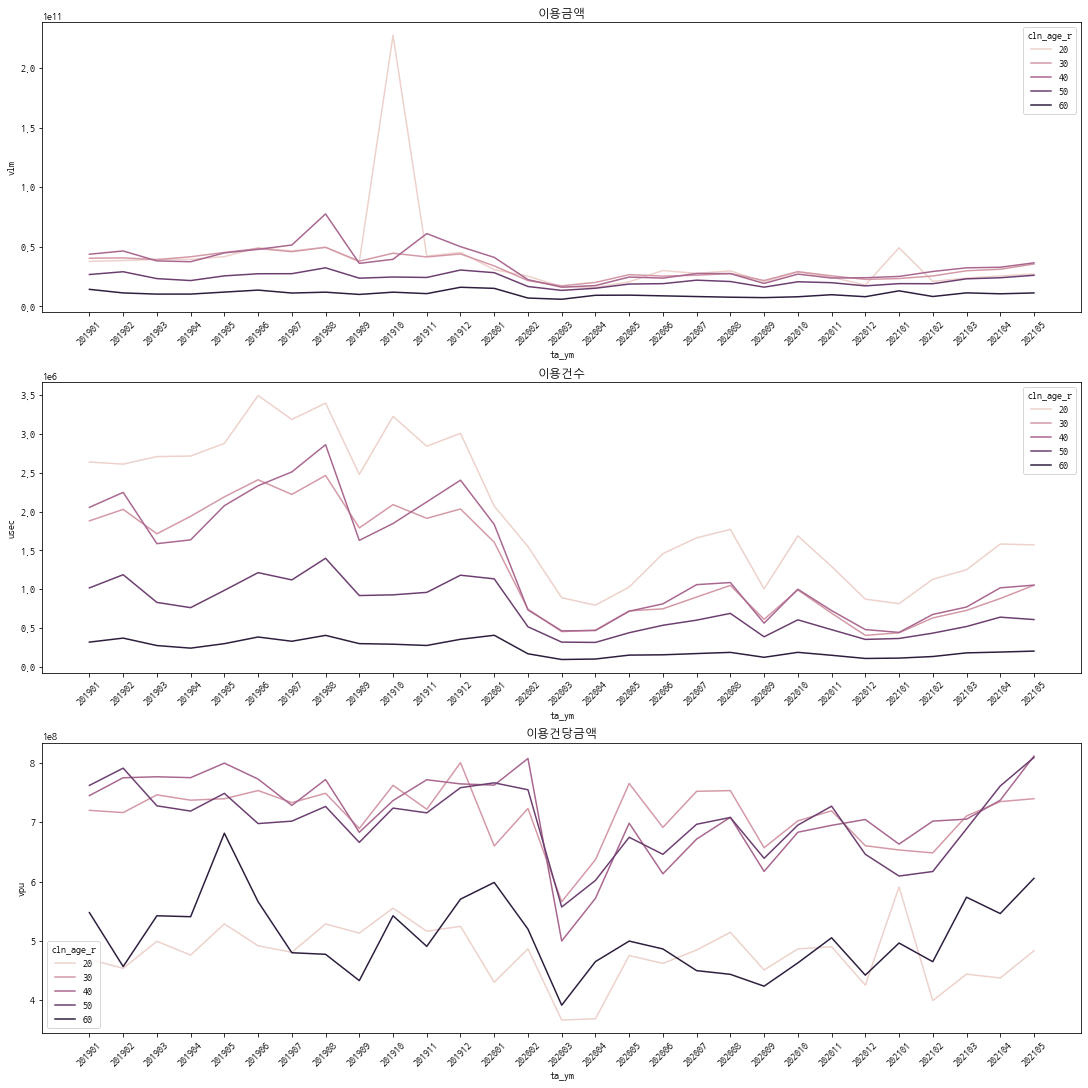

In [420]:
# 문화예술 향유 연령별(이용금액 / 이용건수 / 건당 이용금액)
fig, ax = plt.subplots(3,1,figsize=(15,15),constrained_layout=True)

sns.lineplot(x='ta_ym', y='vlm', hue='cln_age_r', data=ym, ax=ax[0])
ax[0].tick_params (axis= 'x', labelrotation= 45)
ax[0].set_title("이용금액")

sns.lineplot(x='ta_ym', y='usec', hue='cln_age_r', data=ym, ax=ax[1])
ax[1].tick_params (axis= 'x', labelrotation= 45)
ax[1].set_title("이용건수")

sns.lineplot(x='ta_ym', y='vpu', hue='cln_age_r', data=ym, ax=ax[2])
ax[2].tick_params (axis= 'x', labelrotation= 45)
ax[2].set_title("이용건당금액")

plt.show()


- 2019년 10월 20대에겐 무슨 일이?
- 이용금액, 건수 둘다 30대보단 40대가 앞서는 듯한 모습 20 > 40 > 30 > 50 > 60
- 건당 이용금액은 30, 40, 50 대가 높고 20, 60대는 낮음
- 40대의 건당 이용금액이 전반적으로 높은 편으로 보임. 코로나 때 급감했으나, 어느정도 시간이 지나자 다시 윗순위를 탈환하는 듯?

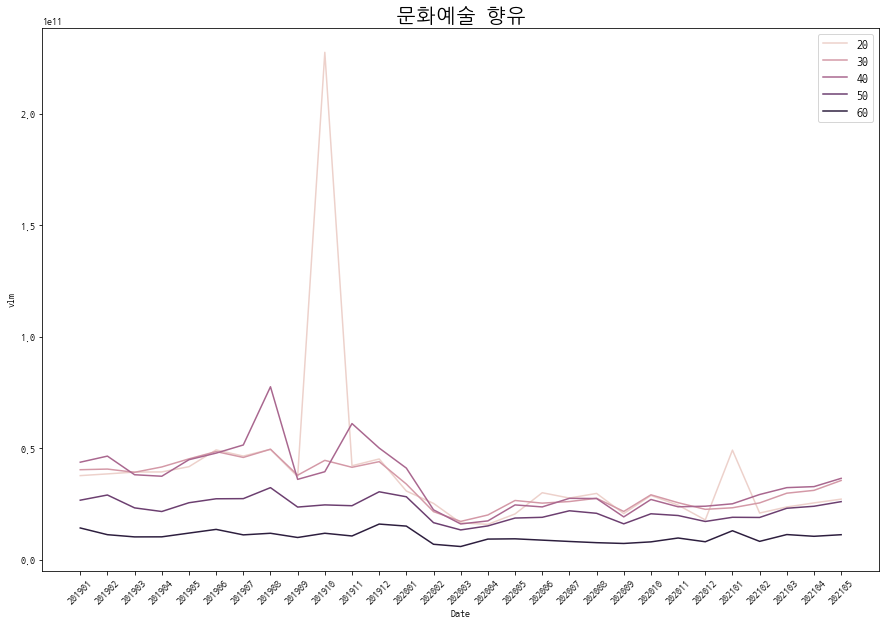

In [354]:
# # 문화예술 향유 (이용건수 합계, 연령별)
# fig,ax = plt.subplots(figsize=(15,10))

# sns.lineplot(x='ta_ym', y='vlm', hue='cln_age_r', data=ym)

# plt.title('문화예술 향유(이용건수)', fontsize=20)
# plt.xlabel('Date', fontsize=10)
# plt.legend(fontsize=12, loc='best')
# plt.tick_params (axis= 'x', labelrotation= 45)

# plt.show()

In [380]:
# 코로나 이전 이후 비교
nt_bf['ta_ym'] = nt_bf['ta_ym'].astype('str')
nt_af['ta_ym'] = nt_af['ta_ym'].astype('str')

/home/dohee/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [382]:
nt_bfym = nt_bf.groupby(['ta_ym','cln_age_r'],as_index=False).sum()
nt_afym = nt_af.groupby(['ta_ym','cln_age_r'],as_index=False).sum()
print(nt_bfym.head(), nt_afym.head())

    ta_ym  cln_age_r            vlm       usec           vpu
0  201701         20  3525704843706  152153580  9.199000e+09
1  201701         30  6258801043602  167907950  1.366358e+10
2  201701         40  7348103648900  166443269  1.621984e+10
3  201701         50  4370429774317   97665097  1.395001e+10
4  201701         60  1860202613770   40974799  9.421796e+09     ta_ym  cln_age_r            vlm       usec           vpu
0  202003         20  3787809902935  161409645  7.548886e+09
1  202003         30  6298782037855  178473235  1.027594e+10
2  202003         40  7076034262485  178515340  1.232224e+10
3  202003         50  4832432744670  125116370  1.220657e+10
4  202003         60  2298343108845   62355405  8.386568e+09


In [383]:
nt_bfym['year'] = nt_bfym['ta_ym'].str[:4]
nt_bfym['month'] = nt_bfym['ta_ym'].str[4:]

nt_afym['year'] = nt_afym['ta_ym'].str[:4]
nt_afym['month'] = nt_afym['ta_ym'].str[4:]

In [384]:
nt_bfym.head()

,ta_ym,cln_age_r,vlm,usec,vpu,year,month
0,201701,20,3525704843706,152153580,9.199000e+09,2017,01
1,201701,30,6258801043602,167907950,1.366358e+10,2017,01
2,201701,40,7348103648900,166443269,1.621984e+10,2017,01
3,201701,50,4370429774317,97665097,1.395001e+10,2017,01
4,201701,60,1860202613770,40974799,9.421796e+09,2017,01


In [430]:
nt_afym.sort_values(by='month')

,ta_ym,cln_age_r,vlm,usec,vpu,year,month
50,202101,20,3505124673295,136101762,7192783326.8716411591,2021,01
51,202101,30,6560660886519,176302927,9864566311.3880405426,2021,01
52,202101,40,7684623379880,180054245,12130345778.6709461212,2021,01
53,202101,50,5391300489192,129907963,12889281068.2583789825,2021,01
54,202101,60,2656876034338,68143949,8589208372.8354940414,2021,01
...,...,...,...,...,...,...,...
48,202012,50,5009703882617,123868338,11999229619.8935871124,2020,12
47,202012,40,7657618131689,182815222,12639224294.1738815308,2020,12
46,202012,30,6829363350975,181799961,10357419327.0760650635,2020,12
45,202012,20,4134079559893,157776973,7384236428.5931816101,2020,12


In [427]:
pd.options.display.float_format = '{:.10f}'.format

(5000000000.0, 18000000000.0)

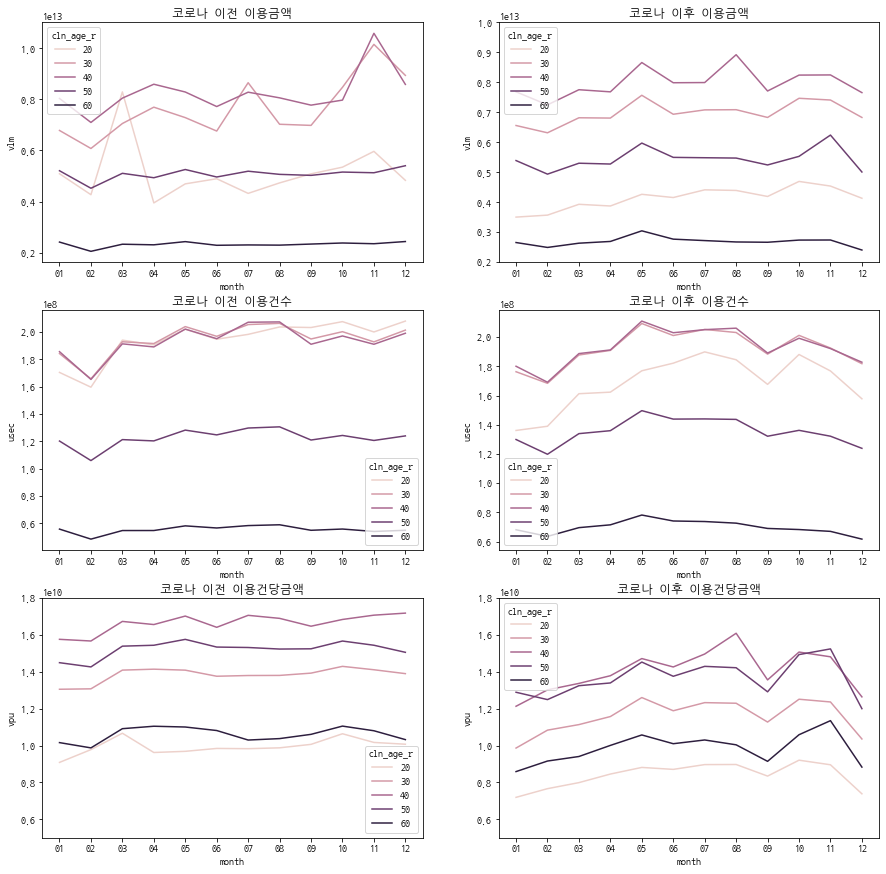

In [440]:
fig,ax = plt.subplots(3,2,figsize =(15,15))


sns.lineplot(x='month', y='vlm', hue='cln_age_r', data=nt_bfym, ax=ax[0,0], ci = None)
sns.lineplot(x='month', y='vlm', hue='cln_age_r', data=nt_afym.sort_values(by='month'), ax=ax[0,1], ci = None)
ax[0, 0].set_title("코로나 이전 이용금액")
ax[0, 1].set_title("코로나 이후 이용금액")
ax[0, 1].set_ylim([0.2e+13, 1e+13])


sns.lineplot(x='month', y='usec', hue='cln_age_r', data=nt_bfym, ax=ax[1,0], ci = None)
sns.lineplot(x='month', y='usec', hue='cln_age_r', data=nt_afym.sort_values(by='month'), ax=ax[1,1], ci = None)
ax[1, 0].set_title("코로나 이전 이용건수")
ax[1, 1].set_title("코로나 이후 이용건수")

sns.lineplot(x='month', y='vpu', hue='cln_age_r', data=nt_bfym, ax=ax[2,0], ci = None)
sns.lineplot(x='month', y='vpu', hue='cln_age_r', data=nt_afym.sort_values(by='month'), ax=ax[2,1], ci = None)
ax[2, 0].set_title("코로나 이전 이용건당금액")
ax[2, 1].set_title("코로나 이후 이용건당금액")
ax[2, 0].set_ylim([0.5e+10, 1.8e+10])
ax[2, 1].set_ylim([0.5e+10, 1.8e+10])

- 코로나 이후 20대의 이용건수 눈에 띄게 감소?
- 이용 건당 금액의 전반적인 감소 -> 이유 찾아보기
- 40대& 30대가 가장 강력한 건 맞는듯?
<br><br>
- 코로나 이후 20대의 문화예술 참여도가 낮아졌다로 해석가능
- 오히려 나머지 연령대에서 이용건수는 비슷하게 유지되며 타격이 경미했다...?
- 또한 코로나 상황에 전체적으로 영향을 받는 듯 비슷한 양상을 보임


In [447]:
ym_kind = ct.groupby(['ta_ym','gb2'],as_index=False).sum()

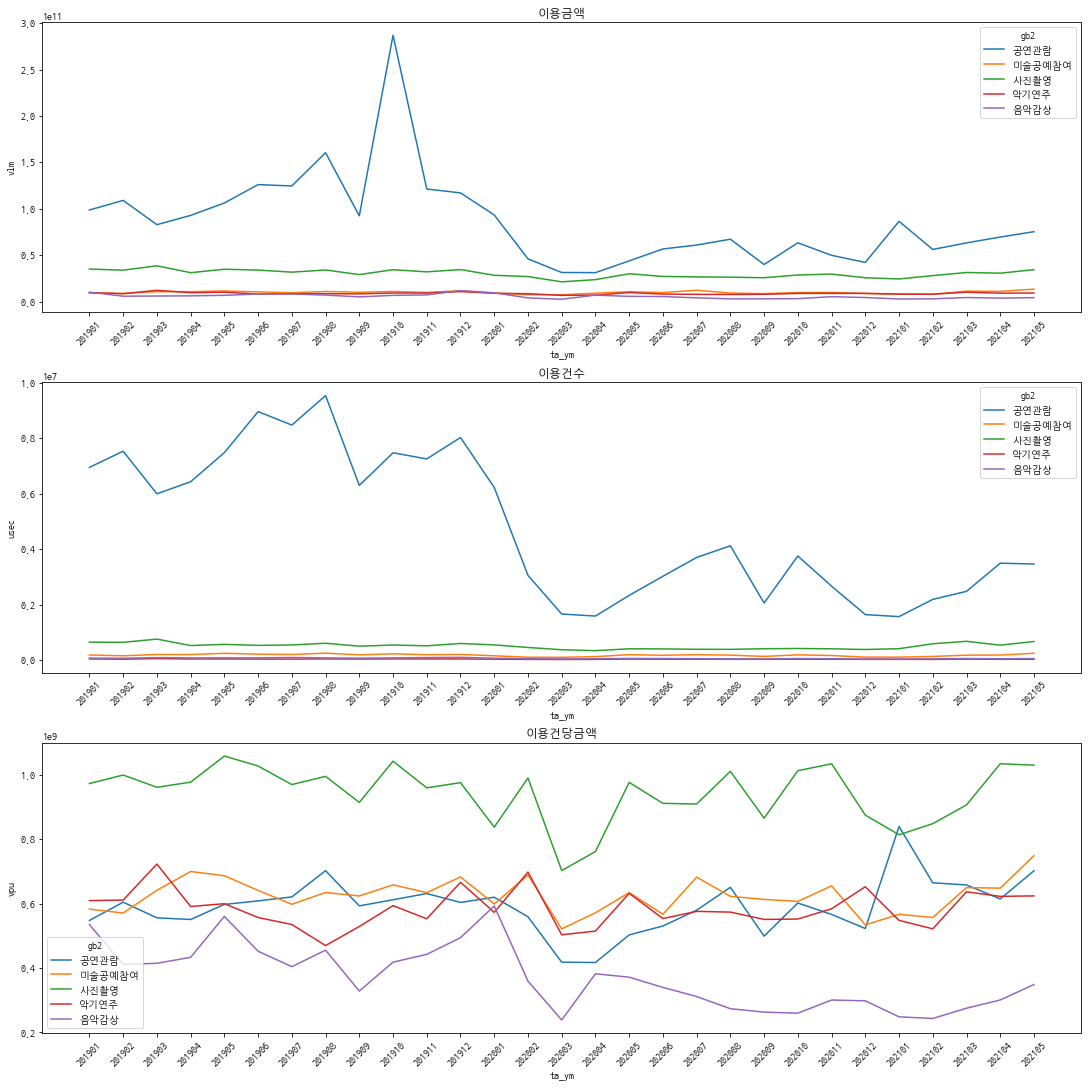

In [448]:
# 문화예술 향유 (문화예술종류별)
fig, ax = plt.subplots(3,1,figsize=(15,15),constrained_layout=True)

sns.lineplot(x='ta_ym', y='vlm', hue='gb2', data=ym_kind, ax=ax[0])
ax[0].tick_params (axis= 'x', labelrotation= 45)
ax[0].set_title("이용금액")

sns.lineplot(x='ta_ym', y='usec', hue='gb2', data=ym_kind, ax=ax[1])
ax[1].tick_params (axis= 'x', labelrotation= 45)
ax[1].set_title("이용건수")

sns.lineplot(x='ta_ym', y='vpu', hue='gb2', data=ym_kind, ax=ax[2])
ax[2].tick_params (axis= 'x', labelrotation= 45)
ax[2].set_title("이용건당금액")

plt.show()


In [449]:
ym_kind_age = ct.groupby(['ta_ym','gb2','cln_age_r'],as_index=False).sum()

Text(0.5, 0.98, '이용금액')

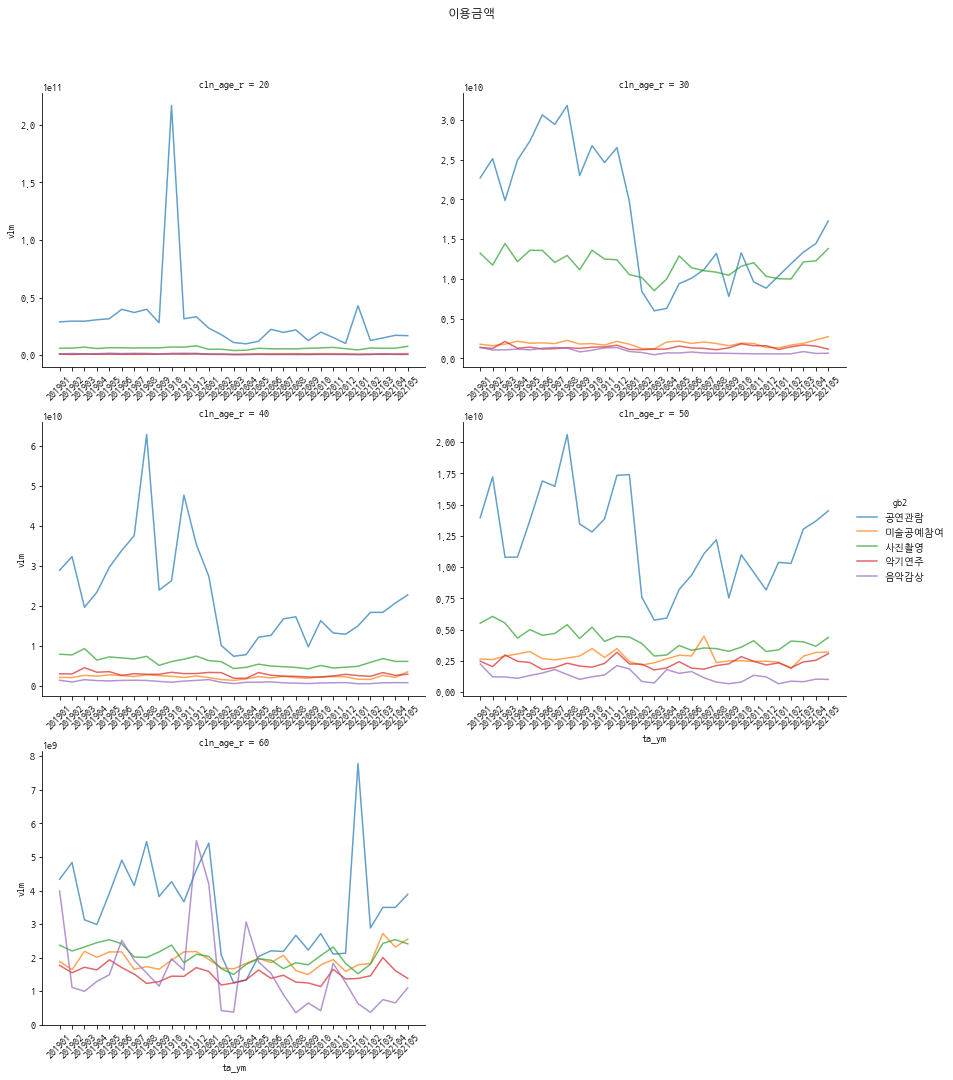

In [488]:
g = sns.FacetGrid(ym_kind_age, col="cln_age_r", col_wrap = 2, hue="gb2", height = 5, aspect = 1.2, sharex = False,
                 sharey = False)
g.map(plt.plot, "ta_ym", "vlm", alpha=.7)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.fig.subplots_adjust(hspace=0.2)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('이용금액')

Text(0.5, 0.98, '이용자수')

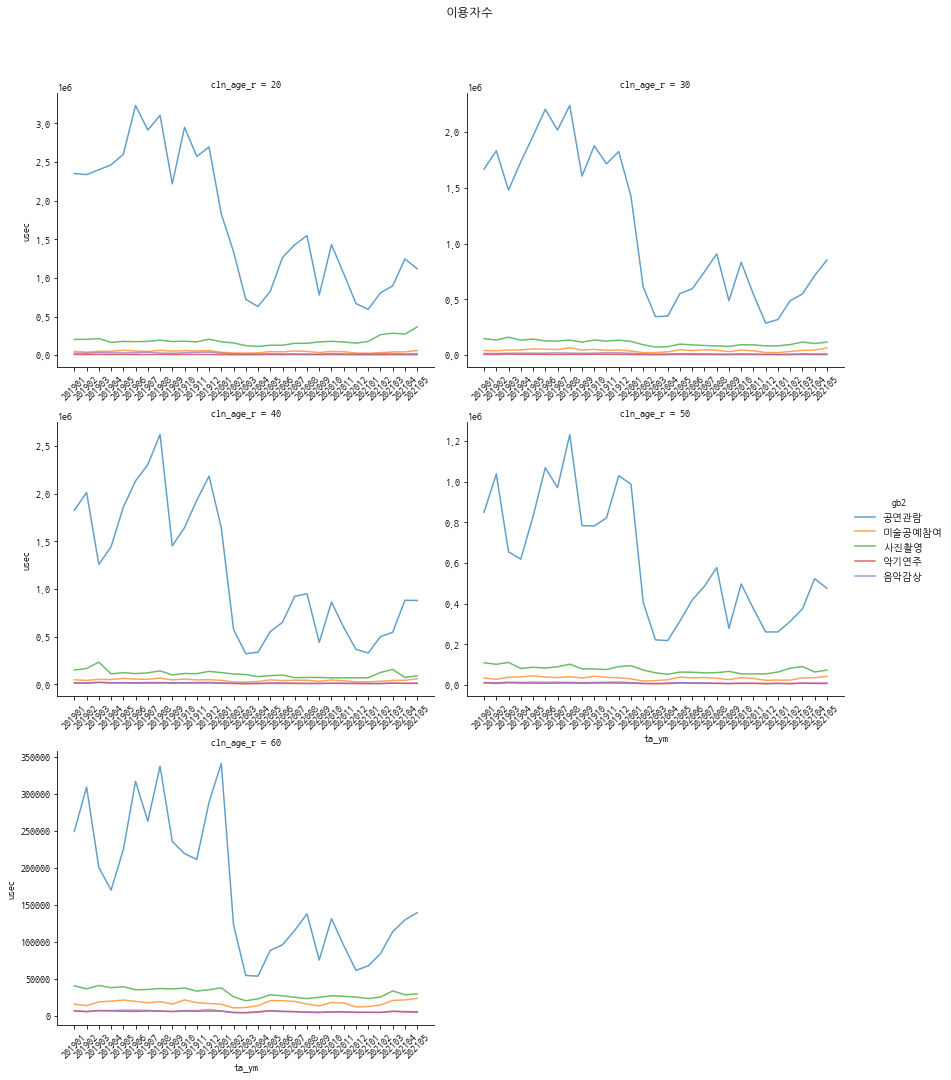

In [490]:
g = sns.FacetGrid(ym_kind_age, col="cln_age_r", col_wrap = 2, hue="gb2", height = 5, aspect = 1.2, sharex = False,
                 sharey = False)
g.map(plt.plot, "ta_ym", "usec", alpha=.7)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.fig.subplots_adjust(hspace=0.2)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('이용자수')

Text(0.5, 0.98, '이용건당금액')

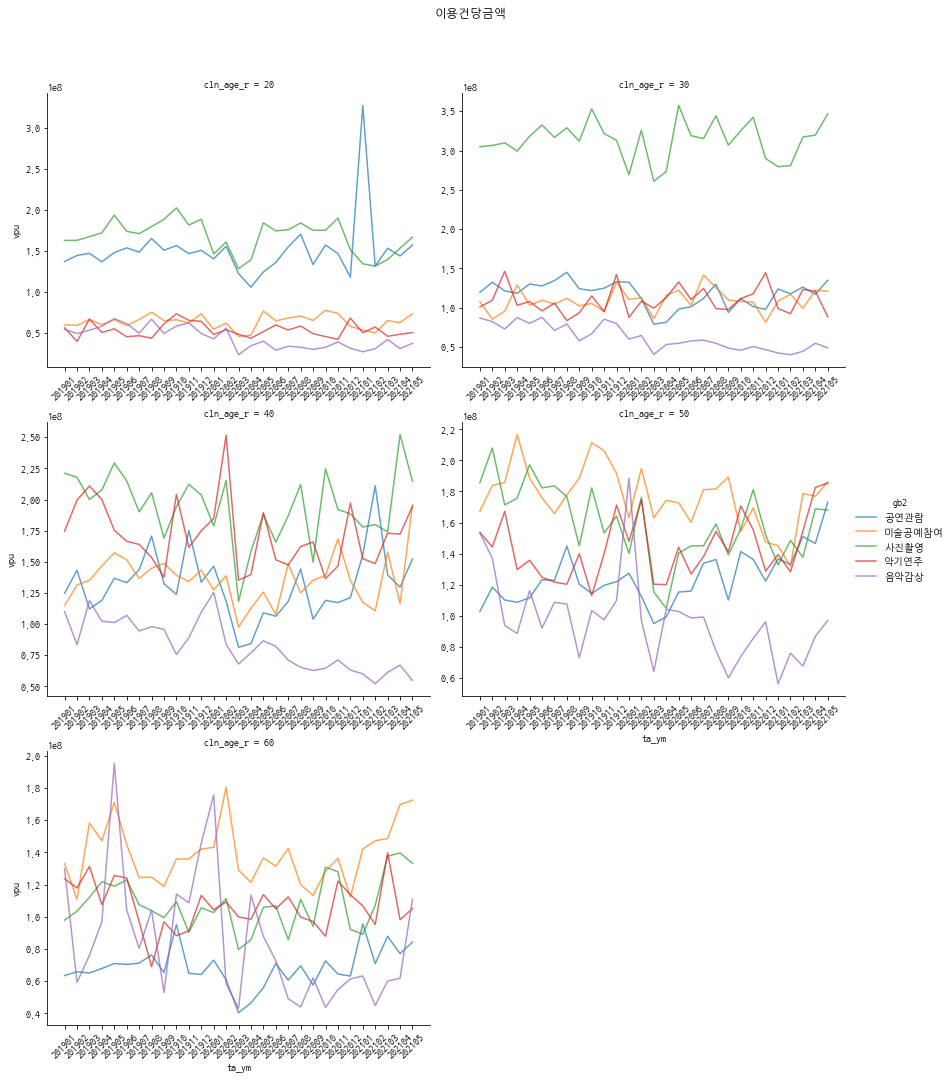

In [491]:
g = sns.FacetGrid(ym_kind_age, col="cln_age_r", col_wrap = 2, hue="gb2", height = 5, aspect = 1.2, sharex = False,
                 sharey = False)
g.map(plt.plot, "ta_ym", "vpu", alpha=.7)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.fig.subplots_adjust(hspace=0.2)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('이용건당금액')

- 코로나 이후 공연관람의 급격한 감소 후 회복패턴 (공연관람은 코로나에 영향을 많이 받는 부문)
- 이용금액에서 20대 2019년 10월에 특이하게 급상승
- 사진촬영의 건수대비 금액이 비싼 편으로 나옴 (30대는 특히 사진촬영에 건당 많은 돈을 투자)
- 이용건수로 보면 비슷한 패턴

In [ ]:
# 문화예술 향유 (취급액 합계, 이용건수 합계, 성별)
ym_sex = ct.groupby(['ta_ym','sex','cln_age_r'],as_index=False).sum()
g = sns.FacetGrid(ct, col="cln_age_r", hue="gb2",height=8)
g.map(plt.bar, "ta_ym", "vlm", alpha=.7)
g.add_legend()

In [ ]:
# 문화예술 향유 (취급액 합계, 이용건수 합계, 주중 주말 구분)

In [ ]:
# 문화예술 향유 (취급액 합계, 이용건수 합계, 지역별)

<function matplotlib.pyplot.show(close=None, block=None)>

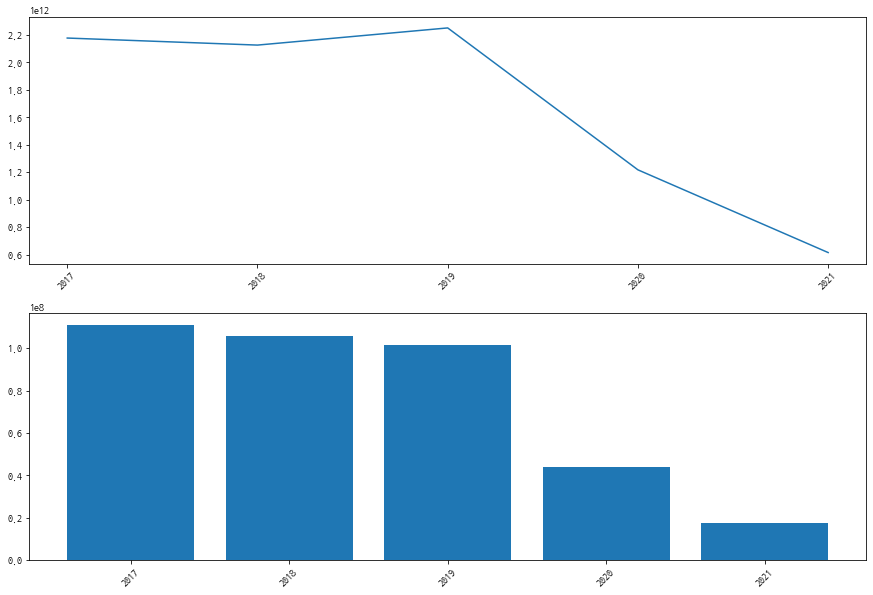

In [282]:
# 월별 문화예술 향유
year = ym.groupby(ym['year'],as_index=False).sum()
year.head()
year['year'] = year['year'].astype('str')
fig,ax = plt.subplots(2,1,figsize=(15,10))

ax[0].plot('year', 'vlm', data = year)
ax[1].bar('year', 'usec', data = year)
ax[0].tick_params (axis= 'x', labelrotation= 45)
ax[1].tick_params (axis= 'x', labelrotation= 45)
plt.show

In [278]:
ct.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
163,전남,광주,동구,문화예술활동,사진촬영,M,20,201701,WHITE,활동,859792,51
196,광주,광주,북구,문화예술활동,공연관람,M,40,201701,RED,활동,11558240,705
208,부산,부산,북구,문화예술활동,공연관람,M,20,201701,WHITE,활동,5114672,501
218,광주,광주,북구,문화예술활동,사진촬영,M,50,201701,RED,활동,3006720,23
238,대구,대구,북구,문화예술활동,공연관람,F,40,201701,WHITE,활동,11013504,788


In [ ]:
# 주중 vs 주말 문화예술 향유

ct
# 주중 vs 주말 문화예술 향유 (예술 종류별)
# 주중 vs 주말 문화예술 향유 (시기 추가)

In [284]:
# 성별별 문화예술 향유 
sex = ct.groupby(ct['sex_ccd']).sum()
sex

# 성별별 문화예술 향유 (시기 추가)

,vlm,usec
sex_ccd,,
F,4096916348155,186699188
M,4293057957656,192577791


In [ ]:
# 연령대별 문화예술 향유

In [ ]:
# 예술 분류별 문화예술 향유

In [ ]:
# 문화예술 컬럼 선택
# 이용시간대별 선택

,ta_ym,vlm,usec
sex_ccd,,,
F,201874.734290,3.298339e+07,861.306592
M,201874.847395,2.439419e+07,684.402197
